In [1]:
# Install libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load the dataset
df = pd.read_csv('../data/reddit_raw.csv')  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  104 non-null    object
 1   title      104 non-null    object
 2   text       104 non-null    object
 3   url        104 non-null    object
 4   created    104 non-null    object
 5   keyword    104 non-null    object
 6   score      104 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [24]:
df.head()

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13


In [25]:
df['subreddit'].value_counts()

subreddit
ukraine            50
IsraelPalestine    50
politics            3
geopolitics         1
Name: count, dtype: int64

In [26]:
# Example for specific subreddit
df[df['subreddit']=='IsraelPalestine'].head()  

,subreddit,title,text,url,created,keyword,score
54,IsraelPalestine,The Pro-Palestine movement is slowly proving i...,**Important to note:**\n\n \n**I sympathize w...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-24 08:31:16,migrant,47
55,IsraelPalestine,At What Point Does Resistance Become Selfishness?,I was taking a look at some numbers of people ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-20 18:22:08,migrant,7
56,IsraelPalestine,Why do Islamic Totalitarian Theocracies get a ...,Just today Arab and Persian sources report on ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-30 00:55:36,migrant,57
57,IsraelPalestine,Myth: Israel Population Mostly Holocaust Refugees,I find the following numbers factual and persu...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-18 20:49:56,migrant,73
58,IsraelPalestine,If the IDF touches Greta thunberg it’s over….,Ya know the other day I was looking into this ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-04 19:13:57,migrant,24


In [27]:
# Example for specific subreddit
df[df['subreddit']=='ukraine'].head()  

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13


In [28]:
# Check the distribution of scores
df['score'].value_counts() 

score
6       5
14      4
30      4
19      4
8       3
       ..
112     1
161     1
166     1
1413    1
23      1
Name: count, Length: 70, dtype: int64

In [29]:
df['keyword'].value_counts()

keyword
refugee                               55
refugees fleeing Russian invasion      9
internal displacement Ukraine          8
migrant                                7
border crossing                        6
eastern Ukraine                        6
immigrantUkrainian refugee             3
Israel war migrant                     3
migration                              2
refugee in Europe                      2
Ukrainian war migrantGaza refugees     2
asylum seeker                          1
Name: count, dtype: int64

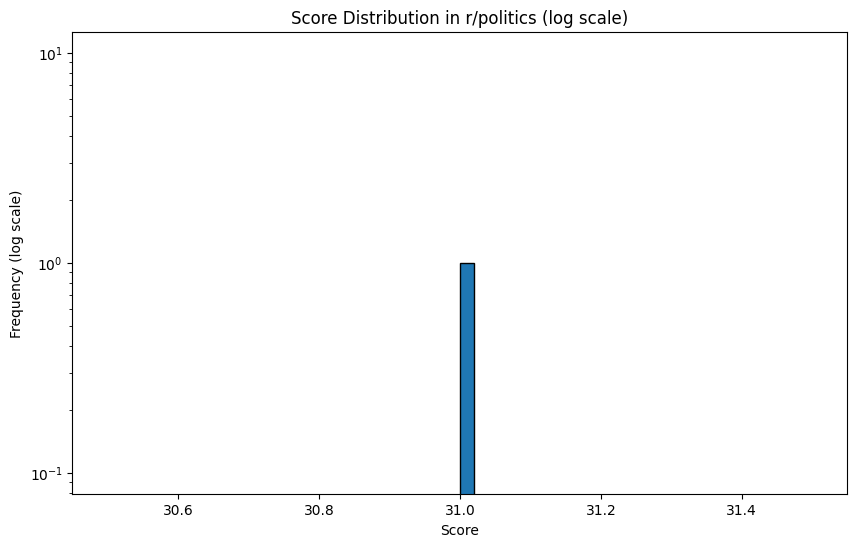

In [31]:
# Plotting the score distribution for a specific subreddit
plt.figure(figsize=(10,6))
scores = df[df['subreddit'] == 'geopolitics']['score']
plt.hist(scores, bins=50, log=True, edgecolor='black')
plt.title('Score Distribution in r/politics (log scale)')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.show()

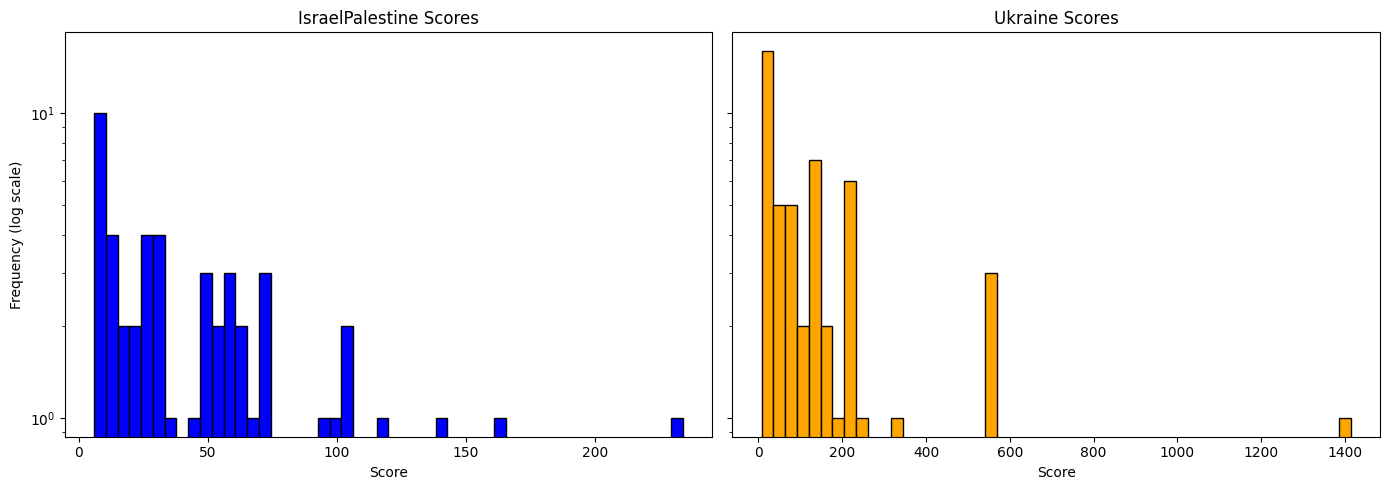

In [32]:
# Plotting the score distribution for two subreddits side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
scores_israel = df[df['subreddit'] == 'IsraelPalestine']['score']
scores_ukraine = df[df['subreddit'] == 'ukraine']['score']
axes[0].hist(scores_israel, bins=50, color='blue', edgecolor='black', log=True)
axes[0].set_title('IsraelPalestine Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency (log scale)')

axes[1].hist(scores_ukraine, bins=50, color='orange', edgecolor='black', log=True)
axes[1].set_title('Ukraine Scores')
axes[1].set_xlabel('Score')

plt.tight_layout()
plt.show()


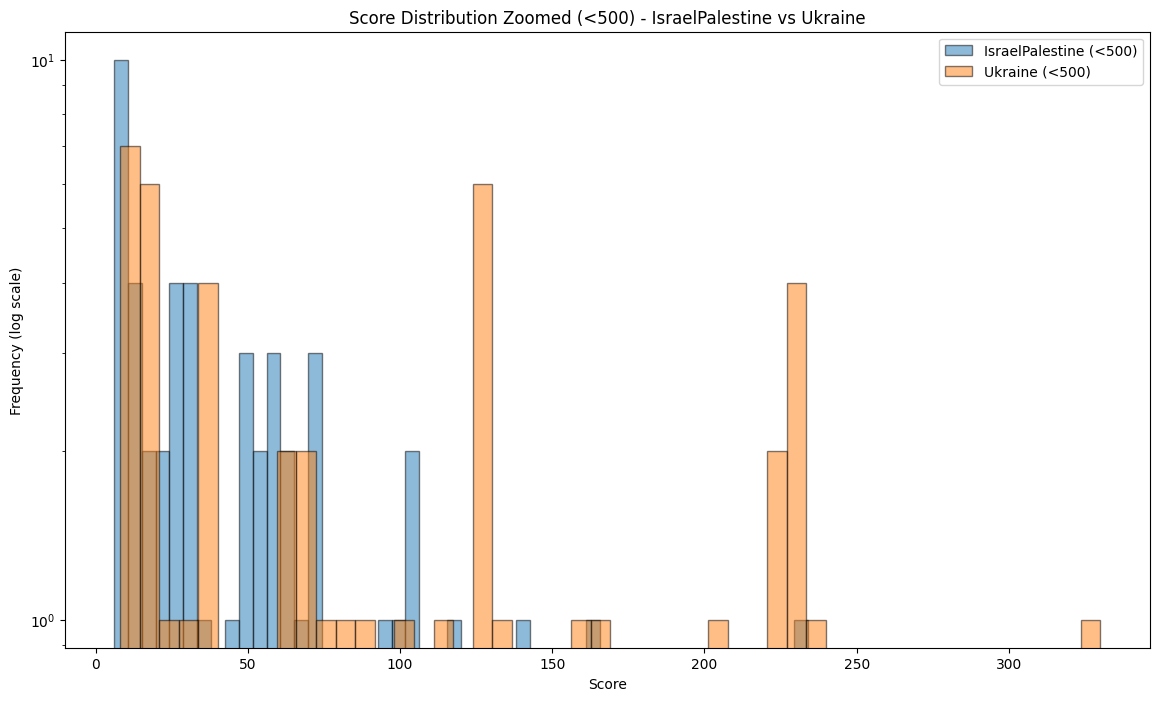

In [33]:
# Plotting the overlapped score distribution zoomed in for scores less than 500 
plt.figure(figsize=(14, 8))

plt.hist(scores_israel[scores_israel < 500], bins=50, alpha=0.5, label='IsraelPalestine (<500)', edgecolor='black', log=True)
plt.hist(scores_ukraine[scores_ukraine < 500], bins=50, alpha=0.5, label='Ukraine (<500)', edgecolor='black', log=True)

plt.title('Score Distribution Zoomed (<500) - IsraelPalestine vs Ukraine')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


Interpretation & implications:

    r/IsraelPalestine appears to have many low-engagement or newly posted items, potentially with more recent or less popular content.

    r/ukraine shows a more varied and engaged set of posts, with more posts earning medium to high scores.

    This may reflect differences in subreddit size, activity, audience engagement, or post longevity.

    It suggests Ukraine discussions might generate broader engagement, while IsraelPalestine posts might be more niche or recently posted.

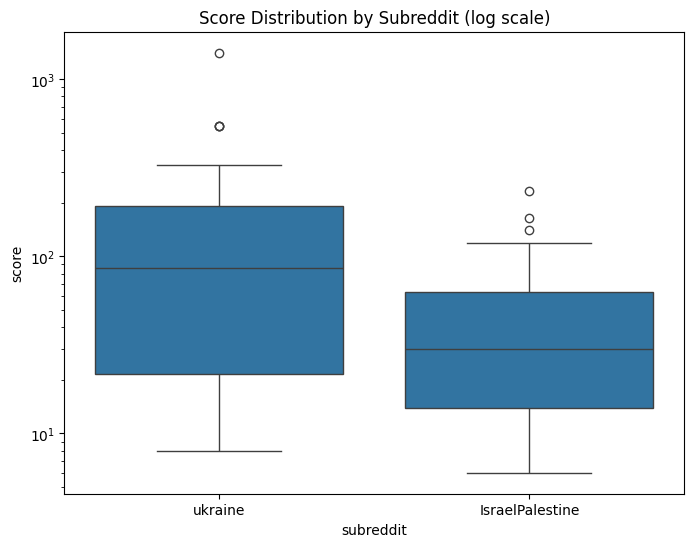

In [34]:
# Boxplot for score distribution by subreddit
plt.figure(figsize=(8, 6))
subset = df[df['subreddit'].isin(['IsraelPalestine', 'ukraine'])]
sns.boxplot(data=subset, x='subreddit', y='score')
plt.yscale('log')
plt.title('Score Distribution by Subreddit (log scale)')
plt.show()


In [35]:
df = df[df['subreddit'] != 'politics']
print(df['subreddit'].unique())

['ukraine' 'geopolitics' 'IsraelPalestine']


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  101 non-null    object
 1   title      101 non-null    object
 2   text       101 non-null    object
 3   url        101 non-null    object
 4   created    101 non-null    object
 5   keyword    101 non-null    object
 6   score      101 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.3+ KB


In [37]:
df['text'].iloc[0:10]

0    Hi,\n\nI’m an American. When the war broke out...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    **Find your representatives here:** [**https:/...
4    Sorry for the vague question, but I only have ...
5    hello, \nI’m not Ukrainian but my friend is. I...
6    **Find your representatives here:** [**https:/...
7    Hello there! \n\nMy now wife and I moved to Iv...
8    I found this useful for understanding my own b...
9    Hi everyone,\n\nI’m planning a short trip from...
Name: text, dtype: object

In [40]:
import sys
sys.path.append('../src')
# Import feature engineering functions
from preprocess import clean_text

In [41]:
df['text'] = df['text'].apply(clean_text)

In [39]:
df['text'].iloc[0:10]

0    Hi, I’m an American. When the war broke out, I...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    Find your representatives here: Subject: Urgen...
4    Sorry for the vague question, but I only have ...
5    hello, I’m not Ukrainian but my friend is. I’m...
6    Find your representatives here: Subject: Urgen...
7    Hello there! My now wife and I moved to Ivano-...
8    I found this useful for understanding my own b...
9    Hi everyone, I’m planning a short trip from Ko...
Name: text, dtype: object